In [33]:
import pymongo
import pandas as pd

In [34]:
client = pymongo.MongoClient()
db = client["bzhan"]
collection = db["info"]

data = list(collection.find())
df = pd.DataFrame(data)
import matplotlib.pyplot as plt

In [35]:
df = df.drop(df[df['标题'] == '暂无'].index)
df
df = df.drop(df[df['转发'] == '分享'].index)

In [36]:
import pandas as pd

# 去除重复数据
df.drop_duplicates(subset=['标题'], keep='first', inplace=True)

# 打印去除重复数据后的DataFrame
print(df)


                           _id                                          标题  \
0     648979001659b92bf86da532                        坚持不懈的青春万岁！加油奥利给哈哈哈哈哈   
1     648979001659b92bf86da533                            韩国人那么晚结婚 父母不催婚吗？   
2     648979001659b92bf86da534                           语言很美好，但绝不是攻击他人的武器   
3     648979001659b92bf86da535                这还能是...植物大战僵尸！？【3】！？戴夫的老年生活！   
4     648979001659b92bf86da536                            EXO《Let Me In》MV   
...                        ...                                         ...   
2442  648979001659b92bf86daebc             科目三模拟考.遇到这样的女研究生.安全员尽力了.只能帮你到这了   
2443  648979001659b92bf86daebd                            女生绑在腿上的圈圈，到底是什么？   
2444  648979001659b92bf86daebe                               能吸引猫咪的声音，百试百灵   
2445  648979001659b92bf86daebf  一口气看完我的世界：当你变成循声守卫和末影龙的后代 在MC里生存100天（1-35）   
2446  648979001659b92bf86daec0                                 鱼饿了，所以送只鸡进去   

         播放量    弹幕      点赞     收藏     投币    转发  
0     477.6万  

In [37]:
def convert_to_int(value):
    if isinstance(value, str):
        if '万' in value:
            number = float(value.replace('万', '')) * 10000
            return int(number)
        else:
            return int(value)


# 将含有万的列转换为整数类型
df['点赞'] = df['点赞'].map(convert_to_int)
df['投币'] = df['投币'].map(convert_to_int)
df['收藏'] = df['收藏'].map(convert_to_int)
df['播放量'] = df['播放量'].map(convert_to_int)
df['弹幕'] = df['弹幕'].map(convert_to_int)
df['转发'] = df['转发'].map(convert_to_int)


In [38]:
try:
    del df['_id']
except KeyError:
    pass

df

,标题,播放量,弹幕,点赞,收藏,投币,转发
0,坚持不懈的青春万岁！加油奥利给哈哈哈哈哈,4776000,6212,1294000,148000,586000,30000
1,韩国人那么晚结婚 父母不催婚吗？,1858000,7276,212000,35000,94000,23000
2,语言很美好，但绝不是攻击他人的武器,1904000,4873,308000,18000,20000,2065
3,这还能是...植物大战僵尸！？【3】！？戴夫的老年生活！,1973000,3279,223000,37000,45000,6546
4,EXO《Let Me In》MV,1018000,19000,127000,47000,102000,34000
...,...,...,...,...,...,...,...
2442,科目三模拟考.遇到这样的女研究生.安全员尽力了.只能帮你到这了,3186000,5995,50000,12000,2767,17000
2443,女生绑在腿上的圈圈，到底是什么？,1124000,1586,16000,7540,225,740
2444,能吸引猫咪的声音，百试百灵,644000,169,4040,5851,875,1927
2445,一口气看完我的世界：当你变成循声守卫和末影龙的后代 在MC里生存100天（1-35）,3024000,1217,23000,92000,2289,99


In [39]:
con = db.info_data
for record in df.to_dict(orient='records'):
    con.insert_one(record)

In [53]:
import pandas as pd
from pyecharts.charts import Scatter
from pyecharts import options as opts

# 假设df是包含数据的DataFrame对象

# 绘制散点图
scatter = (Scatter().add_xaxis(df['点赞']).add_yaxis('转发', df['转发']).add_yaxis(
    '投币', df['投币']).add_yaxis('收藏', df['收藏']).set_global_opts(
        title_opts=opts.TitleOpts(title='投币、收藏、转发与点赞的关系'),
        xaxis_opts=opts.AxisOpts(name='点赞'),
        yaxis_opts=opts.AxisOpts(name='数量'),
    ))

# 生成图表
scatter.render('投币、收藏、转发与点赞的关系.html')

'c:\\FileData\\Code\\Projects\\PythonFlask_Bili\\tests\\投币、收藏、转发与点赞的关系.html'

In [40]:
import wordcloud
import jieba
import imageio
import zhon.hanzi as chz
import string
import pandas as pd
import jieba.analyse
from collections import Counter
import csv
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['SimHei']
import wordcloud

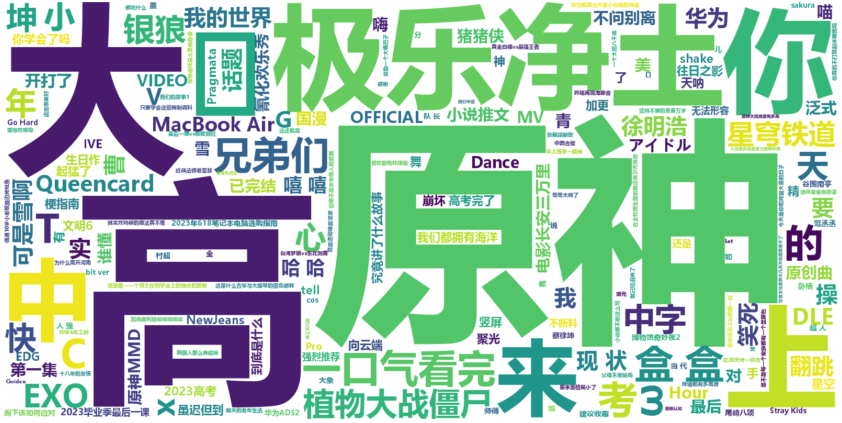

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 假设df是包含数据的DataFrame对象，标题列名为"标题"

# 将标题列的所有数据合并为一个字符串
text = ' '.join(df['标题'].values.tolist())

# 生成词云图
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=r'C:\Windows\Fonts\微软雅黑\msyhbd.ttc',
    scale=2).generate(text)

# 显示词云图
plt.figure(figsize=(40, 40), dpi= 1080/40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
import pandas as pd
from pyecharts.charts import Scatter
from pyecharts import options as opts
from pyecharts.charts import Pie

In [44]:
import pandas as pd
from pyecharts.charts import Pie
import pyecharts
from pyecharts import options as opts

# 假设df是包含数据的DataFrame对象

# 计算点赞、投币、收藏和转发的总数
total_likes = df['点赞'].sum()
total_coins = df['投币'].sum()
total_favorites = df['收藏'].sum()
total_reposts = df['转发'].sum()

# 计算各项占比
like_ratio = total_likes / (total_likes + total_coins + total_favorites +
                            total_reposts)
coin_ratio = total_coins / (total_likes + total_coins + total_favorites +
                            total_reposts)
favorite_ratio = total_favorites / (total_likes + total_coins +
                                    total_favorites + total_reposts)
repost_ratio = total_reposts / (total_likes + total_coins + total_favorites +
                                total_reposts)

# 绘制扇形图
pie = (Pie().add(
    "",
    [('点赞', like_ratio), ('投币', coin_ratio), ('收藏', favorite_ratio),
     ('转发', repost_ratio)],
    radius=["40%", "75%"],
    center=["50%", "50%"],
    rosetype="radius",
    label_opts=opts.LabelOpts(formatter="{b}: {d}%"),
).set_global_opts(
    title_opts=opts.TitleOpts(title='点赞、投币、收藏和转发的占比情况', pos_left="center"),
    legend_opts=opts.LegendOpts(orient="vertical",
                                pos_top="middle",
                                pos_left="2%"),
    toolbox_opts=opts.ToolboxOpts(),
    graphic_opts=[
        opts.GraphicImage(
            graphic_item=opts.GraphicItem(
                id_="黑",
                right=20,
                top=20,
                z=-10,
                bounding="raw",
                origin=[75, 75],
            ),
            graphic_imagestyle_opts=opts.GraphicImageStyleOpts(image="黑.png",
                                                               opacity=0.3),
        )
    ],
).set_series_opts(
    label_opts=opts.LabelOpts(formatter="{b}: {d}%"),
    linestyle_opts=opts.LineStyleOpts(width=2),
))

# 生成图表
pie.render('点赞、投币、收藏和转发的占比情况.html')


'c:\\FileData\\Code\\Projects\\PythonFlask_Bili\\tests\\点赞、投币、收藏和转发的占比情况.html'

In [45]:
from pyecharts.charts import Line

play_count = df['播放量']

# 生成 x 轴和 y 轴数据
x_data = df.index.tolist()  # 假设索引列是时间或序号
y_data = play_count.tolist()

# 绘制折线图
line = (Line().add_xaxis(xaxis_data=x_data).add_yaxis(
    series_name="播放量", y_axis=y_data,
    label_opts=opts.LabelOpts(is_show=False)).set_global_opts(
        title_opts=opts.TitleOpts(title="播放量趋势图"),
        toolbox_opts=opts.ToolboxOpts(),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(name="播放量"),
    ))

# 生成图表
line.render("line_chart.html")

'c:\\FileData\\Code\\Projects\\PythonFlask_Bili\\tests\\line_chart.html'

In [46]:
import pandas as pd
from pyecharts.charts import Bar
from pyecharts import options as opts

# 假设df是包含数据的DataFrame对象

# 提取播放量数据列
play_count = df['播放量']

# 计算播放量的分布
bin_edges = [0, 10000, 50000, 100000, 500000, 1000000]  # 自定义分组边界
bin_labels = ['0-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M']
play_count_bins = pd.cut(play_count,
                         bins=bin_edges,
                         labels=bin_labels,
                         right=False)

# 统计每个分组的数量
count_by_bin = play_count_bins.value_counts().sort_index()

# 绘制直方图
bar = (Bar().add_xaxis(count_by_bin.index.tolist()).add_yaxis(
    "播放量分布", count_by_bin.values.tolist()).set_global_opts(
        title_opts=opts.TitleOpts(title="播放量分布直方图"),
        xaxis_opts=opts.AxisOpts(name="播放量区间"),
        yaxis_opts=opts.AxisOpts(name="数量"),
    ))

# 生成图表
bar.render("播放量分布直方图.html")

'c:\\FileData\\Code\\Projects\\PythonFlask_Bili\\tests\\播放量分布直方图.html'

In [51]:
import pandas as pd
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Tab
from pyecharts.charts import Grid

# 假设 df 是包含数据的 DataFrame 对象

# 提取点赞、收藏、投币、转发和播放量数据列
likes = df['点赞']
favorites = df['收藏']
coins = df['投币']
reposts = df['转发']
play_count = df['播放量']

# 创建点赞的直方图
likes_bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)).add_xaxis(
    likes.index.tolist()).add_yaxis(
        series_name="点赞", y_axis=likes.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="点赞分布直方图"),
            xaxis_opts=opts.AxisOpts(name="点赞"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))

# 创建收藏的直方图
favorites_bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)).add_xaxis(
    favorites.index.tolist()).add_yaxis(
        series_name="收藏", y_axis=favorites.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="收藏分布直方图"),
            xaxis_opts=opts.AxisOpts(name="收藏"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))

# 创建投币的直方图
coins_bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)).add_xaxis(
    coins.index.tolist()).add_yaxis(
        series_name="投币", y_axis=coins.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="投币分布直方图"),
            xaxis_opts=opts.AxisOpts(name="投币"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))

# 创建转发的直方图
reposts_bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)).add_xaxis(
    reposts.index.tolist()).add_yaxis(
        series_name="转发", y_axis=reposts.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="转发分布直方图"),
            xaxis_opts=opts.AxisOpts(name="转发"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))

# 创建播放量的直方图
play_count_bar = (Bar(init_opts=opts.InitOpts(
    theme=ThemeType.LIGHT)).add_xaxis(play_count.index.tolist()).add_yaxis(
        series_name="播放量", y_axis=play_count.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="播放量分布直方图"),
            xaxis_opts=opts.AxisOpts(name="播放量"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))

# 使用Grid组件将图表排列在一起
grid = (Grid().add(likes_bar, grid_opts=opts.GridOpts(pos_bottom="100%")).add(
    favorites_bar, grid_opts=opts.GridOpts(pos_top="25%")).add(
        coins_bar, grid_opts=opts.GridOpts(pos_bottom="0%")).add(
            reposts_bar, grid_opts=opts.GridOpts(pos_top="50%")).add(
                play_count_bar, grid_opts=opts.GridOpts(pos_bottom="75%")))

grid.render("投币、收藏、转发与点赞的关系.html")  # 渲染并保存图表为 HTML 文件


'c:\\FileData\\Code\\Projects\\PythonFlask_Bili\\tests\\投币、收藏、转发与点赞的关系.html'

In [52]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.charts import Tab

# 假设df是包含数据的DataFrame对象

# 提取点赞、收藏、投币、转发和播放量数据列
likes = df['点赞']
favorites = df['收藏']
coins = df['投币']
reposts = df['转发']
play_count = df['播放量']

# 创建 Tab 组件
tab = Tab()

# 绘制点赞的直方图
likes_bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)).add_xaxis(
    likes.index.tolist()).add_yaxis(
        series_name="点赞", y_axis=likes.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="点赞分布直方图"),
            xaxis_opts=opts.AxisOpts(name="点赞"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))
# 添加点赞直方图到 Tab 组件
tab.add(likes_bar, "点赞")

# 绘制收藏的直方图
# 创建收藏的直方图
favorites_bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)).add_xaxis(
    favorites.index.tolist()).add_yaxis(
        series_name="收藏", y_axis=favorites.tolist()).set_global_opts(
            title_opts=opts.TitleOpts(title="收藏分布直方图"),
            xaxis_opts=opts.AxisOpts(name="收藏"),
            yaxis_opts=opts.AxisOpts(name="数量"),
        ))
# 添加收藏直方图到 Tab 组件
tab.add(favorites_bar, "收藏")

# 渲染并保存图表为 HTML 文件
tab.render("投币、收藏、转发与点赞的关系.html")

'c:\\FileData\\Code\\Projects\\PythonFlask_Bili\\tests\\投币、收藏、转发与点赞的关系.html'

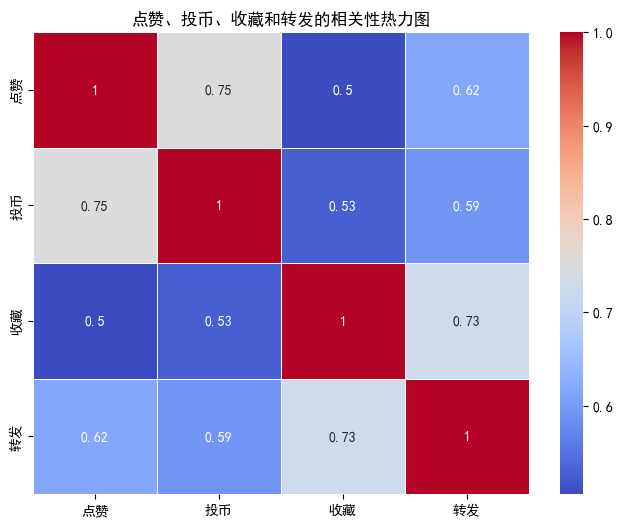

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df是包含数据的DataFrame对象
df = pd.DataFrame(pymongo.MongoClient().bzhan.info_data.find())

# 提取点赞、投币、收藏和转发数据列
likes = df['点赞']
coins = df['投币']
favorites = df['收藏']
reposts = df['转发']

# 构建包含这四个数据列的新DataFrame
data = pd.DataFrame({'点赞': likes, '投币': coins, '收藏': favorites, '转发': reposts})

# 计算相关系数矩阵
correlation_matrix = data.corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('点赞、投币、收藏和转发的相关性热力图')

# 显示图表
plt.show()

In [ ]:
df = pd.DataFrame(pymongo.MongoClient().bzhan.info_data.find())
del df['_id']
df.to_csv('B站热门视频数据.csv', sep=',', index=False, encoding='utf-8-sig')